In [ ]:
# instalação do Weights & Biases
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00


In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import wandb
import pickle
import matplotlib.pyplot as plt
import h5py
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from joblib import dump, load

In [ ]:
# wandb login
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# 1 - Importar o arquivo com o modelo treinado

In [ ]:
# iniciando uma run no wandb
run = wandb.init(entity="flamigos", project="cnn_animation", job_type="test model")

wandb: Currently logged in as: francisco-valmir (flamigos). Use `wandb login --relogin` to force relogin


In [ ]:
# baixando a class necessaria para o pipeline funcionar

artifact = run.use_artifact('flamigos/cnn_animation/imageProcessor_class:latest', type='python')
artifact_dir = artifact.download()
file_path = f"{artifact_dir}/imageProcessor.py"
!mv {file_path} /content/

wandb:   1 of 1 files downloaded.  


In [ ]:
from imageProcessor import ImageProcessor

In [ ]:
# baixando o pipeline
artifact = run.use_artifact('flamigos/cnn_animation/animation_model_pipeline:latest', type='pipeline')
loaded_pipeline = artifact.file()

pipeline = load(loaded_pipeline)

# 2 - Importar o dataset separado para teste

In [ ]:
artifact = run.use_artifact('flamigos/cnn_animation/label_data_test:latest', type='split_data').file()
artifact2 = run.use_artifact('flamigos/cnn_animation/img_data_test:latest', type='split_data').file()
labels = pd.read_csv(artifact)
labels = labels["animation Type"]
data_img = np.load(artifact2)

# 3 - Teste

In [ ]:
predictions = pipeline.predict(data_img)

56/56 [==============================] - 11s 184ms/step


In [ ]:
predict = []
for i in predictions:
    predict.append(np.argmax(i))

In [ ]:
print(classification_report(labels, predict))

# 4 - Teste com imagens pegas na net

1/1 [==============================] - 0s 89ms/step


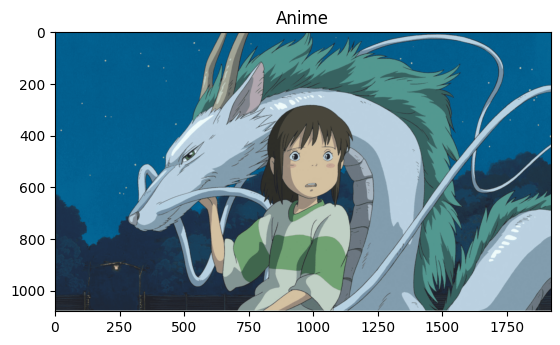

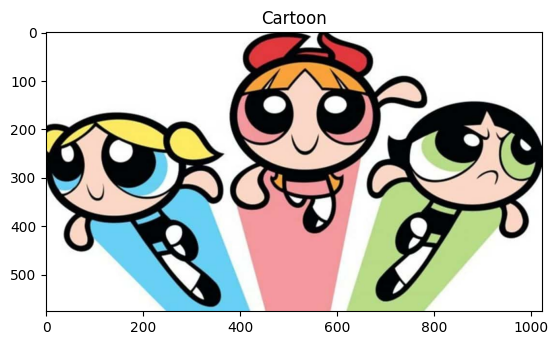

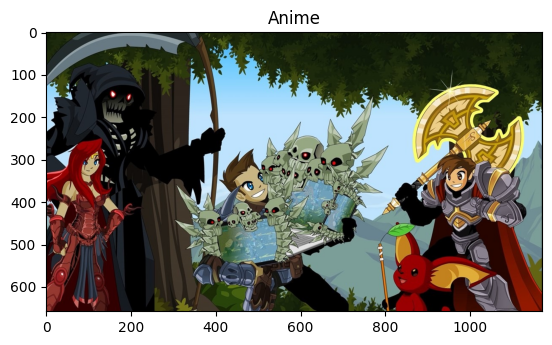

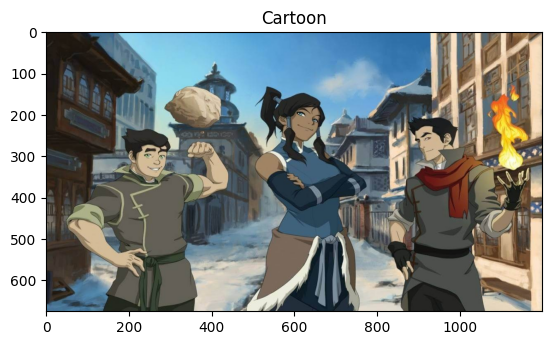

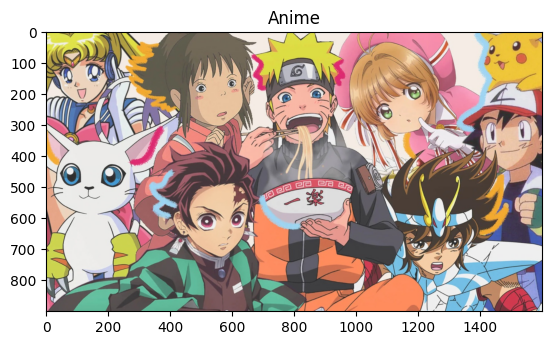

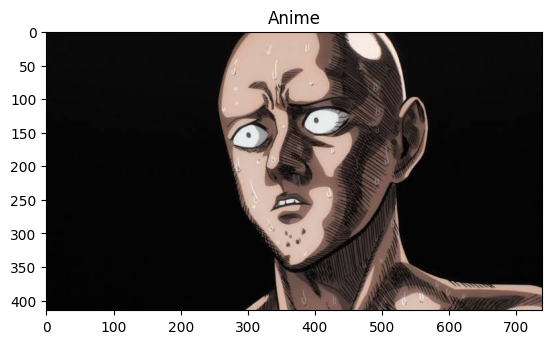

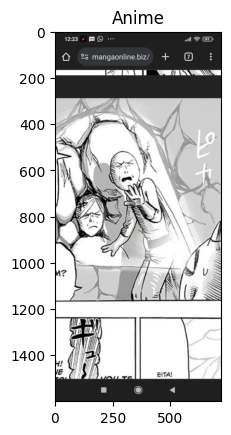

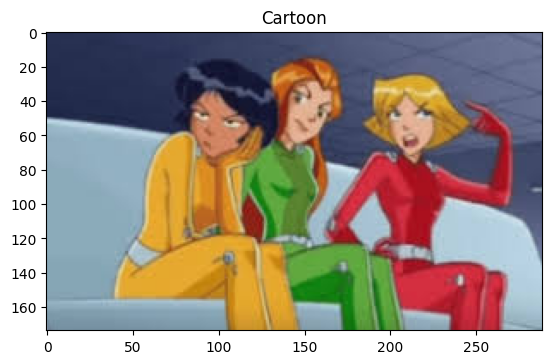

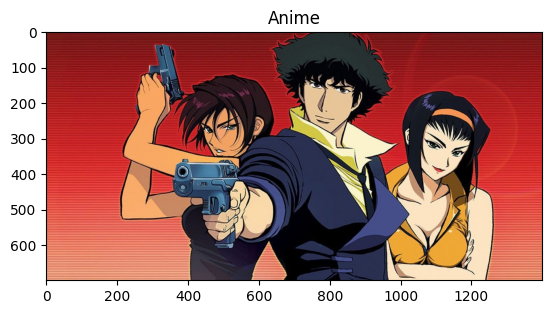

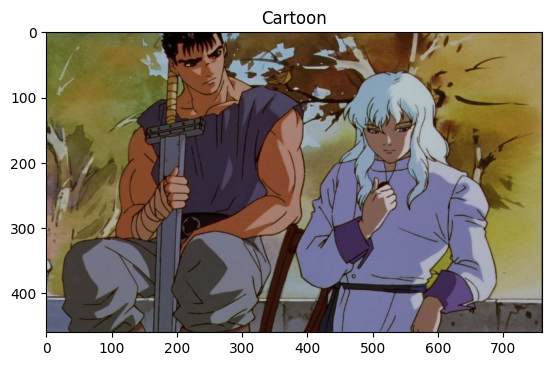

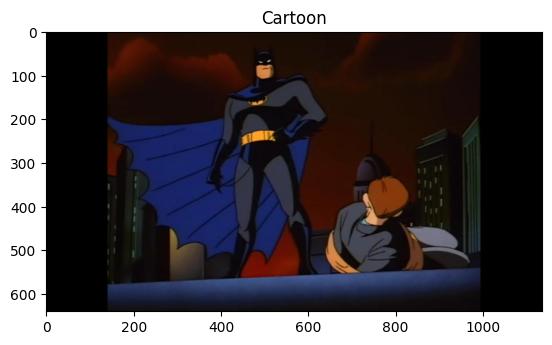

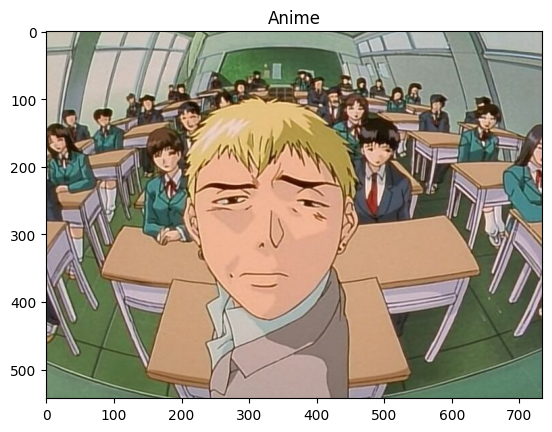

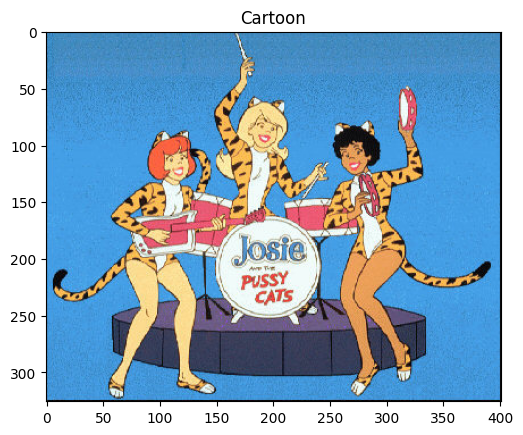

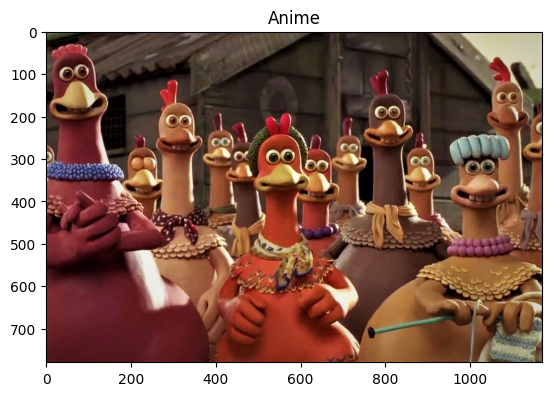

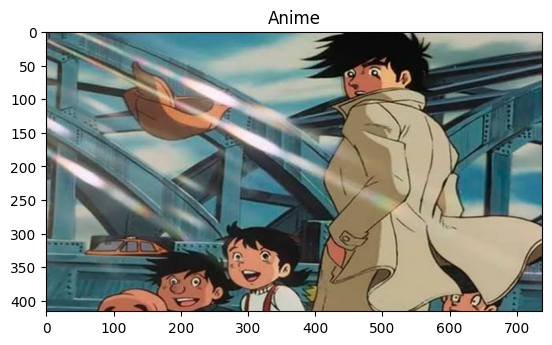

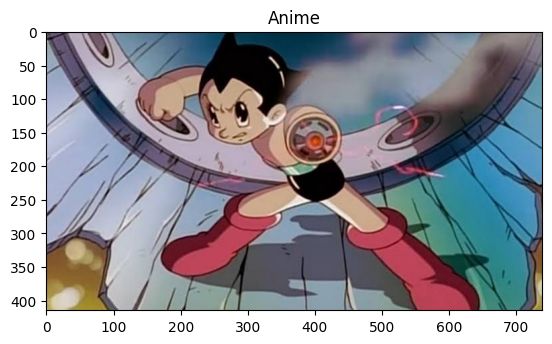

In [ ]:
from PIL import Image

# Exemplo de uso:
image1 = Image.open("/content/anime.png")
image2 = Image.open("/content/cartoon.jpg")
image3 = Image.open("/content/akw.jpeg")
image4 = Image.open("/content/korra.jpeg")
image5 = Image.open("/content/naruto.jpeg")
image6 = Image.open("/content/np1.jpeg")
image7 = Image.open("/content/np2.jpeg")
image8 = Image.open("/content/3.jpeg")
image8 = Image.open("/content/3.jpeg")
image9 = Image.open("/content/bep.jpeg")
image10 = Image.open("/content/BERSERK.jpg")
image11 = Image.open("/content/batman.jpg")
image12 = Image.open("/content/gto.jpg")
image13 = Image.open("/content/pc.jpg")
image14 = Image.open("/content/galinha.jpeg")
image15 = Image.open("/content/boxe.jpeg")
image16 = Image.open("/content/astro.jpeg")

# Adicione quantas imagens desejar ao pipeline
images = [image1, image2, image3, image4, image5, image6, image7, image8, image9, image10, image11, image12, image13, image14, image15, image16]

processed_images = pipeline.predict(images)
binary_array = (processed_images >= 0.5).astype(int)

for i, index in enumerate(range(len(images))):
    plt.figure()
    if(binary_array[index][0] == 1):
      plt.title('Anime')
    else:
      plt.title('Cartoon')

    # Convert Image object to array before showing
    plt.imshow(images[i])

# plt.show()

In [ ]:
run.finish()